<h1 align="center">Práctica de Preprocesado de la información </h1>
<br>
<h4 align="right">Armando Olivares<h4>

<div align="justify">El fichero marketing.csv contiene respuestas a  un cuestionario (preguntas y posibles respuestas en el documento cuestionario.pdf) realizados a clientes de un centro comercial en San Francisco. Se pretende estudiar cómo influyen 13 variables demográficas en los ingresos brutos anuales de los distintos hogares.  
Realiza un análisis exploratorio completo de los datos, prestando especial atención a los missing values y los outliers, y trata de establecer algún tipo de relación entre los ingresos anuales (AnualIncome) y el resto de variables, empleando la técnica que consideres oportuna.</div>

#### Preparación  y carga de los datos

In [1]:
# Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leemos el set de datos
marketing = pd.read_csv('marketing.csv', sep = ';', header = 0, index_col=0)
marketing.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004.0
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004.0
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000.0
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136.0
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136.0



#### Estadísticos básicos 

In [3]:
print(marketing.shape)
print(marketing .describe())
print(marketing.dtypes)

(8993, 14)
               Age   DualIncome      Under18    AnualIncome
count  8991.000000  8993.000000  8993.000000    8988.000000
mean      3.415304     1.544757     0.666852   34712.386960
std       1.637684     0.739565     1.083886   23474.183257
min       1.000000     1.000000     0.000000     460.000000
25%       2.000000     1.000000     0.000000   11703.000000
50%       3.000000     1.000000     0.000000   27591.000000
75%       4.000000     2.000000     1.000000   46894.000000
max       7.000000     3.000000     9.000000  253600.000000
Sex                  object
MaritalStatus        object
Age                 float64
Education            object
Occupation           object
YearsInSf            object
DualIncome            int64
HouseholdMembers     object
Under18               int64
HouseholdStatus      object
TypeOfHome           object
EthnicClass          object
Language             object
AnualIncome         float64
dtype: object


Importante señalar que aunque hay algunas variables que el sistema está tratando como numéricas, revisando el archivo de descripción de los datos notamos que **todas** las variables, a excepción de *AnualIncome* son variables categóricas.

Revisaremos ahora la distribución de los valores:

In [4]:
names = list(marketing.columns)
for row in names:
    if row !="AnualIncome":
        print("------ "+row+ "-----")
        print (marketing[row].value_counts())
    print("\n")


------ Sex-----
2       4917
Male    4073
Name: Sex, dtype: int64


------ MaritalStatus-----
5    3654
1    3333
3     874
2     668
4     302
?     160
Name: MaritalStatus, dtype: int64


------ Age-----
3.0    2249
2.0    2128
4.0    1614
5.0     922
1.0     878
6.0     640
7.0     560
Name: Age, dtype: int64


------ Education-----
4    3065
3    2041
5    1524
2    1046
6     966
1     264
?      86
Name: Education, dtype: int64


------ Occupation-----
1    2815
6    1488
4    1061
2     769
3     765
8     689
5     650
9     336
7     272
?     136
Name: Occupation, dtype: int64


------ YearsInSf-----
5    5181
2    1042
?     914
4     900
3     686
1     270
Name: YearsInSf, dtype: int64


------ DualIncome-----
1    5438
2    2211
3    1344
Name: DualIncome, dtype: int64


------ HouseholdMembers-----
2    2664
3    1670
1    1618
4    1525
5     685
?     375
6     239
7     105
8      56
9      52
Name: HouseholdMembers, dtype: int64


------ Under18-----
0    5724
1    1

Algunos NA de nuestros datos están marcados como **?** por lo que debemos tener especial cuidado para prder limpiar nuestro datos correctamente.

Primero eliminaremos los registro cuyas filas tengas más de **7 *?* ** (si existieran) ya que no nos aportarían mucha información, más bien agregarían ruido a los datos.

In [5]:
((marketing.applymap(lambda x:x =="?")).sum(1)>7).value_counts()


False    8993
dtype: int64

Afortunadamente no tenemos filas con esa cantidad de **?**

Existen algunos problemas con nuestros datos que debemos atender antes del proceder a realizar mayores análisis, primero obsevamos que la variable **age**  presenta los valores **2** y **Male** por lo que debemos recodificar para que los valores tengan la misma escala, es decir **Male**, **Female**:

In [6]:
marketing.loc[marketing["Sex"] == "Male", "Sex"] = "1"
marketing["Sex"].value_counts()

2    4917
1    4073
Name: Sex, dtype: int64

A continuación la variable **Marital Status** presenta **Missing Values** ( alrededor de 160 valores representados por el símbolo **?**), esta variable está codificada del 1-5 del acuerdo a la situación marital de la persona encuestada por lo que valores nulos no deberían existir ya que cubre todos los rangos posibles, decidimos (¿tal vez una suposicion arriesgada?) imputar estos valores al valor **5** es decir *Single, Never Married*

In [7]:
marketing.MaritalStatus.unique()

array(['1', '5', '3', '2', '4', '?', nan], dtype=object)

In [8]:
marketing.loc[marketing["MaritalStatus"] == "?", "MaritalStatus"] = "5"

In [9]:
marketing.MaritalStatus.unique()

array(['1', '5', '3', '2', '4', nan], dtype=object)

In [10]:
marketing.MaritalStatus.isnull().sum()

2

Los 2 valores nulos **nan** tambien los imputaremos hacia el valor *5*

In [11]:
marketing.loc[marketing["MaritalStatus"].isnull(), "MaritalStatus"] = "5"
marketing.MaritalStatus.unique()

array(['1', '5', '3', '2', '4'], dtype=object)

La variable *Education* la imputaremos a la moda

In [12]:
marketing.loc[marketing["Education"] == "?", "Education"]= marketing.Education.mode()[0]
marketing.Education.unique()

array(['4', '5', '2', '3', '6', nan, '1'], dtype=object)

También el *nan*

In [13]:
marketing.loc[marketing["Education"].isnull(), "Education"] = marketing.Education.mode()[0]
marketing.Education.unique()

array(['4', '5', '2', '3', '6', '1'], dtype=object)

Lo mismos para el resto de la variables: serán **imputadas a la moda** de los valores presentes:

In [14]:
names = list(marketing.columns)
for row in names:
    if marketing[row].dtype =="O":
        marketing.loc[marketing[row] == "?", row]= marketing[row].mode()[0]
        marketing.loc[marketing[row].isnull(), row] = marketing[row].mode()[0]
        print("------ "+row+ "-----")
        print (marketing[row].value_counts())   


------ Sex-----
2    4920
1    4073
Name: Sex, dtype: int64
------ MaritalStatus-----
5    3816
1    3333
3     874
2     668
4     302
Name: MaritalStatus, dtype: int64
------ Education-----
4    3152
3    2041
5    1524
2    1046
6     966
1     264
Name: Education, dtype: int64
------ Occupation-----
1    2963
6    1488
4    1061
2     769
3     765
8     689
5     650
9     336
7     272
Name: Occupation, dtype: int64
------ YearsInSf-----
5    6095
2    1042
4     900
3     686
1     270
Name: YearsInSf, dtype: int64
------ HouseholdMembers-----
2    3043
3    1670
1    1618
4    1525
5     685
6     239
7     105
8      56
9      52
Name: HouseholdMembers, dtype: int64
------ HouseholdStatus-----
Rent                        3913
Own                         3255
Live with Parents/Family    1825
Name: HouseholdStatus, dtype: int64
------ TypeOfHome-----
1    5430
3    2373
2     655
5     384
4     151
Name: TypeOfHome, dtype: int64
------ EthnicClass-----
7    5879
5    1231
3    

#### Gestión de datos en blanco (missing values)

In [15]:
marketing.isnull().sum()

Sex                 0
MaritalStatus       0
Age                 2
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
AnualIncome         5
dtype: int64

Observamos que las variables *Age* y la variable *AnualIcome* presentan Valores nulos, por lo que *Age* la imputaremos a la moda y *AnualIcome* a la mediana de los datos

In [16]:
marketing.loc[marketing["Age"].isnull(), "Age"] = marketing.Age.mode()[0]


In [17]:
marketing.loc[marketing["AnualIncome"].isnull(), "AnualIncome"] = marketing.AnualIncome.median()

In [18]:
marketing.isnull().sum()

Sex                 0
MaritalStatus       0
Age                 0
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
AnualIncome         0
dtype: int64

Ya **no** tenemos valores nulos, vacíos, etc que puedan entorpecer nuestro análisis

#### Momento de revisar los valores extemos (outliers)

Hacemos uso del boxplot para observa gráficamente cualquier valor extremo.

Para ello primero convertimos nuestras variables a enteros **int64** para procesar los boxplots, eso implica tambien que debemos recodificar a nuestra variable **HouseholdStatus**

In [19]:
recoding = {"HouseholdStatus":  {"Own":1, "Rent": 2, "Live with Parents/Family":3}}
marketing=marketing.replace(recoding)

In [20]:
marketing.loc[:, marketing.columns != 'AnualIncome'] = marketing.loc[:, marketing.columns != 'AnualIncome'] .apply(lambda x: x.astype('int64'))
marketing.dtypes

Sex                   int64
MaritalStatus         int64
Age                   int64
Education             int64
Occupation            int64
YearsInSf             int64
DualIncome            int64
HouseholdMembers      int64
Under18               int64
HouseholdStatus       int64
TypeOfHome            int64
EthnicClass           int64
Language              int64
AnualIncome         float64
dtype: object

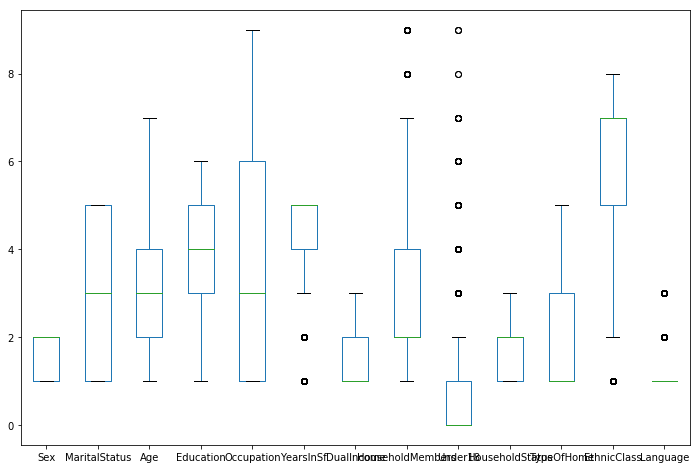

In [21]:
marketing.loc[:,marketing.columns != "AnualIncome" ].plot(return_type='axes', figsize=(12,8), kind='box')
plt.show()

Para Nuestra Variable **AnualIncome**:

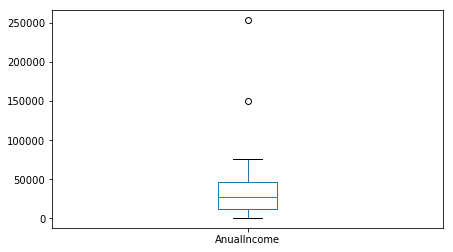

In [22]:
marketing.AnualIncome.plot(return_type='axes', figsize=(7,4), kind='box')
plt.show()

Si queremos tener un idea del rango que datos que componen desde el 10 al 90% de la distribución:

In [23]:
marketing.quantile([0.1, 0.9])

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
0.1,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,9136.0
0.9,2.0,5.0,6.0,6.0,8.0,5.0,3.0,5.0,2.0,3.0,3.0,7.0,1.0,66994.0


<br>
<br>

### De lo anterior notamos:
 - Para la variable **YearsInSF**: los **outlier** son aquellos valores en los que las personas manifestaron tener **poco tiempo** viviendo en el área de San Francisco (Alrededor de 1-2 años).
 - Para la variable **HouseholdMembers**: los **outliers** representan a las personas que viven en un mismo hogar con **más de 8 personas**.
 - Para la variable **Under18** los outlier son las personas que viven con **más de 3 niños/adolescentes**.   
 - Para la variable **EthnicClass** los outlier son los **Amerindios**.
 - Para **Language** los outlier son las personas que **no hablan ingles** en sus hogares.
 - Por ultimo para nuestra variable de interés **AnualIncome** los outlier son las personas que ganan más **$150.000** por año.

#### ¿Cuantos outliers hay en cada variable?

Variable *YearsInSf*:

In [24]:
(marketing.YearsInSf <=2 ).sum()

1312

Variable HouseholdMembers:

In [25]:
(marketing.HouseholdMembers >=8 ).sum()

108

Variable Under18:

In [26]:
(marketing.Under18 >=3 ).sum()

615

Variable EthnicClass:

In [27]:
(marketing.EthnicClass <=1 ).sum()

150

Variable Language:

In [28]:
(marketing.Language >=2 ).sum()

840

Variable AnualIncome:

In [29]:
(marketing.AnualIncome >=150000 ).sum()

2

Con esta última variable al tener solo 2 outliers decidimos eliminarlos de nuestro dataset

In [30]:
marketing = marketing.drop(marketing[marketing.AnualIncome >=150000].index)
(marketing.AnualIncome >=150000 ).sum()

0

A pesar del hecho que nuestro datos están limpios, Debemos tener presente la existencia de esto ouliers para que no distorsionen nuestro análisis

## Estudio de Relación entre las variables predictoras y a predecir

Lo primero que debemos señalar es que nuestro dataset se compone de variables **categóricas**, por lo que visualizaremos las distribuciones y su relacián con la variable a **AnualIncome** con la ayuda de **Gráficos de Violin** (violin plots) del paquete *seaborn*

In [31]:
import seaborn as sns

Primero re-etiquetaremos nuestro datos de acuerdo a su descripción según el cuestionario:

In [32]:
recoding = {"Sex":     {1: "Female", 2: "Male"},
                "Age": {1: "14 thru 17", 2: "18 thru 24", 3: "25 thru 34", 4: "35 thru 44",
                                  5:  "45 thru 54",  6:  "55 thru 64", 7:  "65 and Over" },
                "MaritalStatus": {1: " Married", 2: "Living together", 3: "Divorced", 4: "Widowed ",
                                  5:  "Single" },
                "Education": {1: "Grade <8", 2: "Grades 9-11", 3: "High school", 4: "1-3 years college",
                                  5:  "College graduate", 6:"Grad Study " },
             "Occupation": {1: "Professional", 2: "Sales", 3: "Factory", 4: "Clerical",
                                  5:  "Homemaker", 6:" Student",   7:  "Military", 8:"Retired", 9:"Other" },
            "YearsInSf": {1: "0-1year", 2: " 1-3 years", 3: "4-6 years", 4: "7-10 years",
                                  5:  "more 10 yrs" },
              "DualIncome": {1: "NotMarried", 2: "yes", 3: "No" },
            
              "TypeOfHome": {1: "House", 2: "Condomiun", 3: "Apartment", 4: "Mobile",
                                  5:  "Other" },
            "EthnicClass": {1: "American Indian", 2: "Asian", 3: "Black", 4: "E Idian",
                                 5:  "Hispanic", 6:"Pacific",   7:  "White", 8:"Other" },
            
             "Language": {1: "English", 2: "Spanish", 3: "Other" },
            "HouseholdStatus":  {1: "Own", 2: "Rent", 3:"Live with Parents/Family"}
            
           }
marketing=marketing.replace(recoding)


Hacemos los gráficos:

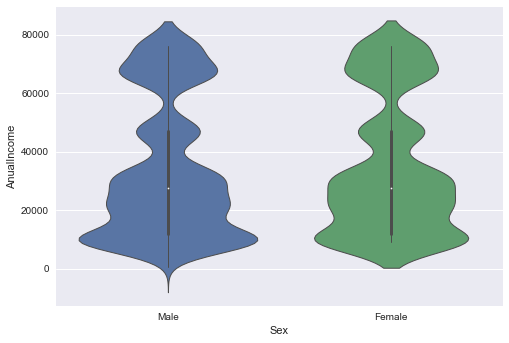

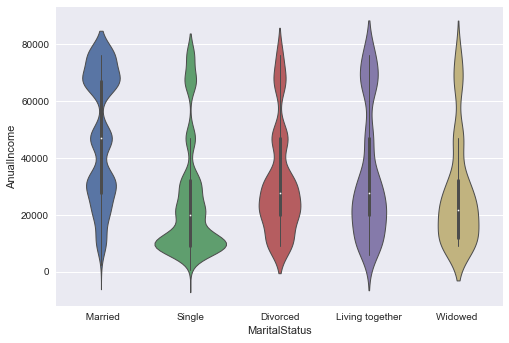

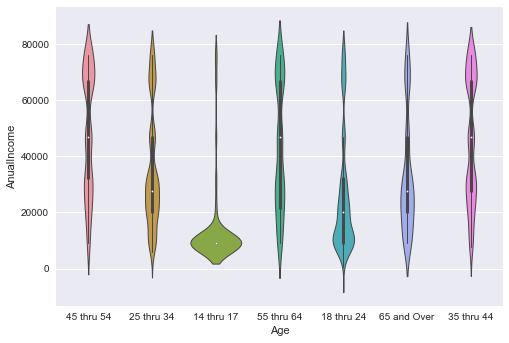

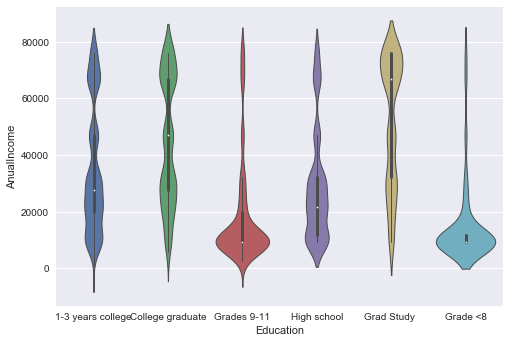

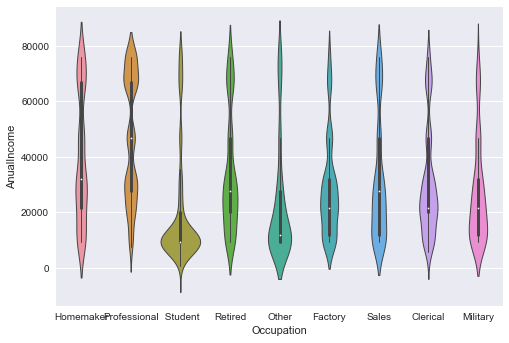

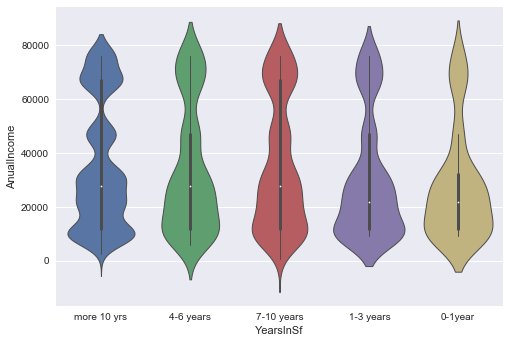

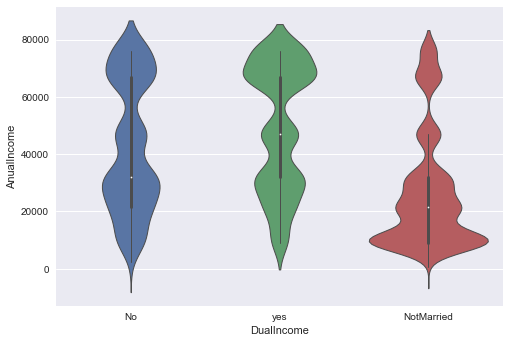

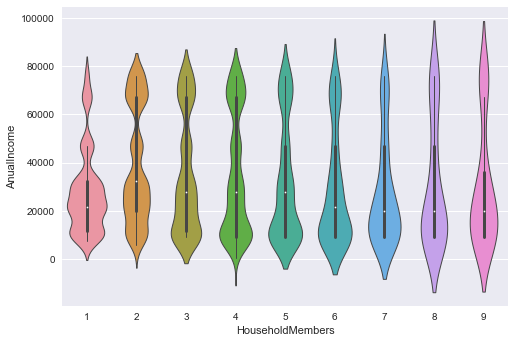

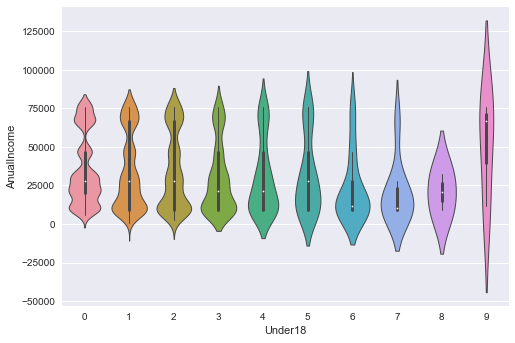

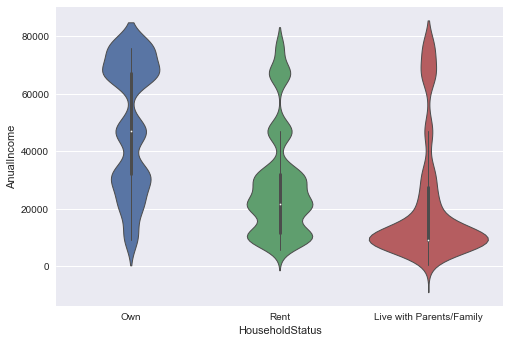

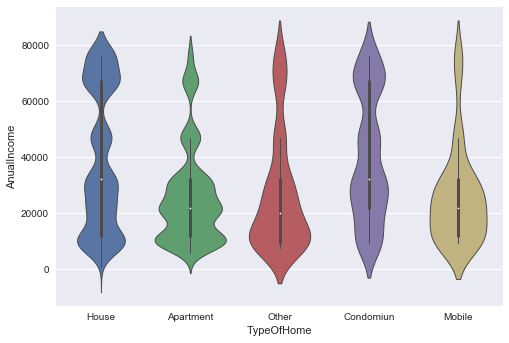

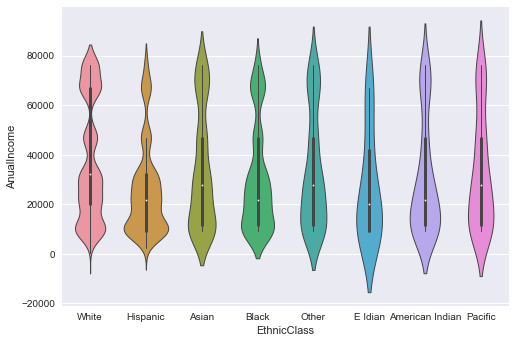

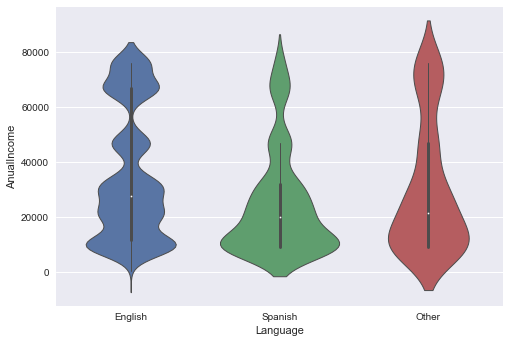

In [33]:

names = marketing.loc[:, marketing.columns!="AnualIncome"].columns
for name in names:
    ax=sns.violinplot(x=name, y="AnualIncome", data=marketing, linewidth=1)
    plt.show()

<br>
<br>
#### De los gráficos se extrae:
1. Los hombres y las mujeres tienen (según los datos) **ingresos similares**.
2. En promedio una persona **casada** presenta **mayor** ingreso anual, mientras que una persona soltera tiene de media, los más bajos.
3. Con respecto a la edad se nota que el rango de edad donde los **ingresos son mayores** es entre **35-64 años**, luego decae (parece haber una **relación positiva ingresos/edad** en el rango 14-54 años).
4. Como es de esperar las personas con estudios **Universitarios y Postgrados** tienen los mejores salarios.
5. Los profesiones y/o personas con cargos gerencias tienen los ingresos más altos.
6. En promedio las personas que tienen mucho tiempo (más de 4 años) viviendo tienen mayores salarios que los recién llegados, sin embargo **no** es tan marcada la **diferencia** como se puede notar.
7. Las personas que tiene 2 ingresos por estar casado tienen las cifras más altas (nada nuevo)
8. Los hogares con **muchos miembros** parecen tener los **ingresos más bajos**, lo que es preocupante (desde el punto de vista social) ya que hay más miembros de la familia que atender.
9. Igual sucede en los hogares con muchos miembros jóvenes y/o niños.
10. Las personas **dueñas** de su propio **hogar** generalmente tienen **mayores ingresos** que los que viven alquilados o en casa de familiares.
11. Las personas de **raza blanca y asiáticas** presentan **mayores ingresos** que los latinos, personas de raza negra, raza India, y Amerindios.
12. Por supuesto las personas que hablan ingles tienen mejores ingresos que los que no lo hablan.
    

#### Por ultimo intentaremos crear un Modelo predictivo, es decir buscaremos una relación lineal en nuestros datos los cuales  deben ser numericos, por esa razón debemos recodificar nuestros datos con la tecnica *one-hot-encoding* utilizando la función *get_dummies* de pandas


Dividiremos nuestros datos en train, test al 80-20

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
X = marketing.loc[:, marketing.columns !="AnualIncome"]
X = pd.get_dummies(X, columns=X.columns, prefix=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, marketing.AnualIncome, test_size=0.2, random_state=0)   

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(7192, 75)
(1799, 75)
(7192,)
(1799,)


Construimos el Modelo de regresión Lineal

In [36]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


Hacemos la predicciones:

In [37]:
predictions = lm.predict(X_test)
print(predictions)

[ 54912.  13696.  39296. ...,  53888.  36480.  14720.]


Obtenemos la métrica de desempeño :

In [38]:
lm.score(X_test,Y_test)

0.382897815874641

In [39]:
Y_test.head()

3289    46894.0
4257     9136.0
2732    66994.0
4216    27591.0
8092    11703.0
Name: AnualIncome, dtype: float64

Como se puede notar es un modelo bastante malo y bastante básico con un error del **38%**  (también debemos recordad que tenemos 75 variables luego del *one-hot-encoding*) sin embargo este modelo está hecho **solo** para **ilustrar un poco**.
</br>
</br>



<br>
#### En resumen:
 -  Nuestros datos **No** se relacionan **linealmente**, para realizar un modelo regresivo los datos deben ser tratados con técnicas como *one-hot-enoding* lo que agrega alta dimensionalidad y consecuentemente llenando de errores/ruido a nuestro modelo de ML; Por lo que para poder hacer un mejor modelo predictivo se deben explorar otros métodos  como *Random Forest*, *knn*, e incluso *Deep learning*.
 - Existen variables de nuestro datos parecen tener un cierta relación con la variable **AnualIncome** como por ejemmplo la edad, la educacion, el poseer un vivienda, son variables que **al menos parcialmente** nos dan un indicativo de si una persona tendrá o no un ingreso alto.